In [1]:
import json

In [2]:
#load data into the dataframe
import pandas as pd

dfAllData = pd.read_csv('data/phase2DataAllwithps.csv')

print(dfAllData.head()) 

           url  domainStart  domainEnd  sslStart  sslEnd  \
0    bosnayapi         3531       1215        49      41   
1      fizyopt         1024         69        23      67   
2       franke         8618        146        18      72   
3    e-yonetim         4859        253         4      86   
4  mescainsaat         1633        192        39      51   

                   sslIssuer  label  dlPhishingScore  
0  Google Trust Services LLC      0         0.001109  
1              Let's Encrypt      0         0.053668  
2              Let's Encrypt      0         0.553775  
3              Let's Encrypt      0         0.304773  
4              Let's Encrypt      0         0.003063  


In [3]:
#shuffling the data frame elements
dfTest=dfAllData.sample(frac = 1)

In [4]:
dfTest.head(10).to_excel("samplePhase2Data.xlsx")

In [6]:
dfAllData["sslIssuer"].unique()

array(['Google Trust Services LLC', "Let's Encrypt", 'cPanel, Inc.',
       'Isimtescil Bilisim A.S.', 'Cloudflare, Inc.', 'GoDaddy.com, Inc.',
       'Sectigo Limited', nan, 'GlobalSign nv-sa', 'DigiCert Inc',
       'Gandi', 'ZeroSSL', 'Unizeto Technologies S.A.', 'Entrust, Inc.',
       'COMODO CA Limited', 'SSL Corporation', 'DigiCert, Inc.',
       'E-TUGRA EBG BILISIM TEKNOLOJILERI VE HIZMETLERI ANONIM SIRKETI',
       'Amazon', 'Starfield Technologies, Inc.', 'GoGetSSL',
       'Corporation Service Company', 'Trust Provider B.V.',
       'CentralNic Luxembourg Sàrl', 'TrustAsia Technologies, Inc.'],
      dtype=object)

In [5]:
sslDict={}
t=0
for str in dfAllData["sslIssuer"].unique():
    if str not in sslDict.keys():
        sslDict[str]=t
        t+=1
    

In [6]:
sslDict

{'Google Trust Services LLC': 0,
 "Let's Encrypt": 1,
 'cPanel, Inc.': 2,
 'Isimtescil Bilisim A.S.': 3,
 'Cloudflare, Inc.': 4,
 'GoDaddy.com, Inc.': 5,
 'Sectigo Limited': 6,
 nan: 7,
 'GlobalSign nv-sa': 8,
 'DigiCert Inc': 9,
 'Gandi': 10,
 'ZeroSSL': 11,
 'Unizeto Technologies S.A.': 12,
 'Entrust, Inc.': 13,
 'COMODO CA Limited': 14,
 'SSL Corporation': 15,
 'DigiCert, Inc.': 16,
 'E-TUGRA EBG BILISIM TEKNOLOJILERI VE HIZMETLERI ANONIM SIRKETI': 17,
 'Amazon': 18,
 'Starfield Technologies, Inc.': 19,
 'GoGetSSL': 20,
 'Corporation Service Company': 21,
 'Trust Provider B.V.': 22,
 'CentralNic Luxembourg Sàrl': 23,
 'TrustAsia Technologies, Inc.': 24}

In [12]:
# Convert and write JSON object to file
with open("data/sslIssuers.json", "w") as outfile: 
    json.dump(sslDict, outfile)

In [7]:
def digitizeSsl(strIn):
    global sslDict
    if strIn in sslDict.keys():
        return sslDict[strIn]
    else:
        return len(sslDict)+1

In [8]:
dfAllData["sslIssuerNum"]=dfAllData["sslIssuer"].apply(digitizeSsl)

In [9]:
print(dfAllData.head()) 

           url  domainStart  domainEnd  sslStart  sslEnd  \
0    bosnayapi         3531       1215        49      41   
1      fizyopt         1024         69        23      67   
2       franke         8618        146        18      72   
3    e-yonetim         4859        253         4      86   
4  mescainsaat         1633        192        39      51   

                   sslIssuer  label  dlPhishingScore  sslIssuerNum  
0  Google Trust Services LLC      0         0.001109             0  
1              Let's Encrypt      0         0.053668             1  
2              Let's Encrypt      0         0.553775             1  
3              Let's Encrypt      0         0.304773             1  
4              Let's Encrypt      0         0.003063             1  


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
dataDfX=dfAllData.drop(['url', 'sslIssuer','label'], axis=1)

In [12]:
dataDfX.head()

,domainStart,domainEnd,sslStart,sslEnd,dlPhishingScore,sslIssuerNum
0,3531,1215,49,41,0.001109,0
1,1024,69,23,67,0.053668,1
2,8618,146,18,72,0.553775,1
3,4859,253,4,86,0.304773,1
4,1633,192,39,51,0.003063,1


In [13]:
output_rows = dfAllData['label']

In [14]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()
scaler.fit(dataDfX)
t_df = scaler.transform(dataDfX)

In [16]:
t_df[0:10]

array([[0.3465502 , 0.34682391, 0.12722646, 0.10632911, 0.00095898,
        0.        ],
       [0.10050054, 0.03966765, 0.0610687 , 0.1721519 , 0.05352635,
        0.04166667],
       [0.84581411, 0.06030555, 0.04834606, 0.18481013, 0.55370842,
        0.04166667],
       [0.47688684, 0.08898419, 0.01272265, 0.22025316, 0.30466851,
        0.04166667],
       [0.16027088, 0.07263468, 0.10178117, 0.13164557, 0.00291349,
        0.04166667],
       [0.09490627, 0.05521308, 0.03053435, 0.20253165, 0.04507753,
        0.04166667],
       [0.64402787, 0.21978022, 0.00508906, 0.2278481 , 0.0141096 ,
        0.04166667],
       [0.07802532, 0.29697132, 0.02290076, 0.21012658, 0.15148896,
        0.        ],
       [0.22769654, 0.08415974, 0.17048346, 0.06329114, 0.06131825,
        0.08333333],
       [0.48748651, 0.06003752, 0.043257  , 0.18987342, 0.00175029,
        0.04166667]])

In [17]:
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataDfX, output_rows , test_size=0.2, random_state=1)

In [18]:
dataDfX.head()

,domainStart,domainEnd,sslStart,sslEnd,dlPhishingScore,sslIssuerNum
0,3531,1215,49,41,0.001109,0
1,1024,69,23,67,0.053668,1
2,8618,146,18,72,0.553775,1
3,4859,253,4,86,0.304773,1
4,1633,192,39,51,0.003063,1


In [19]:
y_test.value_counts()

1    4937
0    4120
Name: label, dtype: int64

In [20]:
scaler = MinMaxScaler()
# fit scaler on the training dataset
scaler.fit(X_train)
# transform the training dataset
X_train_scaled = scaler.transform(X_train)

In [22]:
import pickle

In [23]:
# save the scaler
pickle.dump(scaler, open('data/scaler.pkl', 'wb'))

In [111]:
print(f"Ssl Issuer Number Feature\nTop 10 Unique Values:\n{dataDfX['sslIssuerNum'].value_counts()[0:10]}")

Ssl Issuer Number Feature
Top 10 Unique Values:
7     28041
1     11740
0      2079
6      1607
2       618
4       475
11      165
9       146
3       135
8        65
Name: sslIssuerNum, dtype: int64


In [25]:
import matplotlib.pyplot as plt

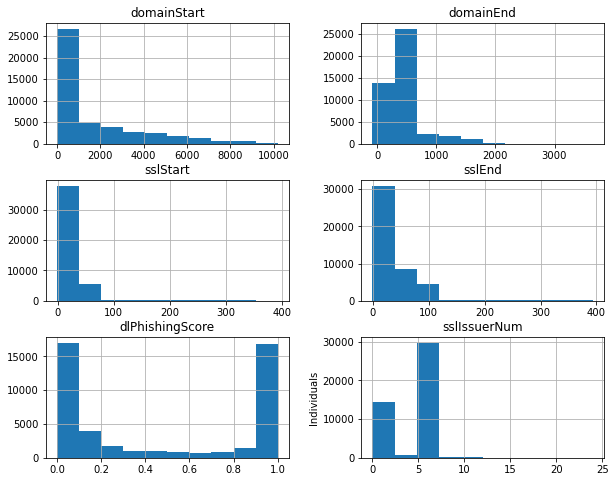

In [26]:
dataDfX.hist(figsize=(10, 8))
plt.show()

In [61]:
import pickle

In [27]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

In [63]:
from pickle import dump

In [28]:
from sklearn.svm import SVC

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [30]:
#X_train, X_test, y_train, y_test = train_test_split(t_df, output_rows , test_size=0.1, random_state=1)

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

accuracy, precision, recall,f1,cm = {}, {}, {},{},{}

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(X_train, y_train)
    
    # Make predictions
    predictions = models[key].predict(X_test)
    pickle.dump(models[key], open(key+'.sav', 'wb'))
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)
    f1[key] = f1_score(predictions, y_test)
    cm[key] = confusion_matrix(y_test, predictions, labels=models[key].classes_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [65]:
import matplotlib.pyplot as plt

In [32]:
import pandas as pd

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall',"F1"])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()
df_model['F1'] = f1.values()

df_model

,Accuracy,Precision,Recall,F1
Logistic Regression,0.965331,0.977314,0.959817,0.968487
Support Vector Machines,0.940157,0.958882,0.933176,0.945854
Decision Trees,0.978580,0.981973,0.978801,0.980384
Random Forest,0.983659,0.983593,0.986390,0.984990


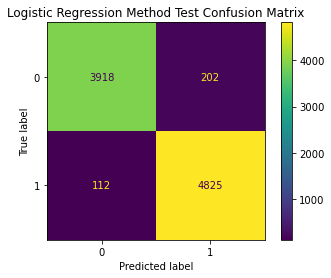

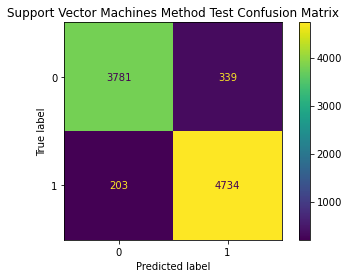

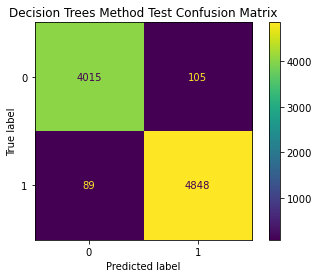

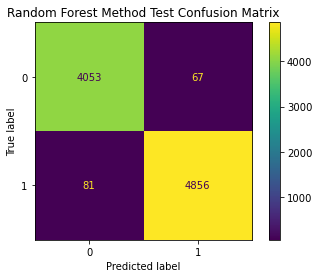

In [33]:
for key in models.keys():
    disp = ConfusionMatrixDisplay(confusion_matrix=cm[key],display_labels=models[key].classes_)
    disp.plot()
    plt.title(key+" Method Test Confusion Matrix")
    plt.show()
    

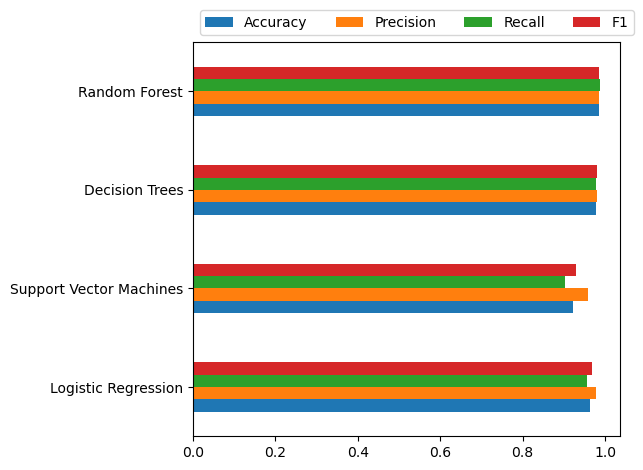

In [67]:
ax = df_model.plot.barh()
ax.legend(
    ncol=len(models.keys()), 
    bbox_to_anchor=(0, 1), 
    loc='lower left', 
    prop={'size': 10}
)
plt.tight_layout()

In [68]:
import matplotlib.pyplot as pyplot

Feature: domainStart, Score: -0.00162
Feature: domainEnd, Score: -0.00058
Feature: sslStart, Score: -0.00938
Feature: sslEnd, Score: -0.00917
Feature: dlPhishingScore, Score: 7.84023
Feature: sslIssuerNum, Score: 0.34930


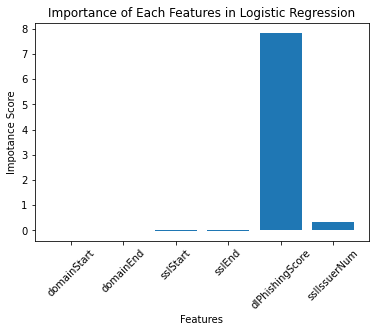

In [35]:
featureList=['','']
importance = models['Logistic Regression'].coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0s, Score: %.5f' % (dataDfX.columns[i],v))
# plot feature importance
plt.title('Importance of Each Features in Logistic Regression')
plt.bar([x for x in dataDfX.columns], importance)
plt.xticks(rotation = 45)
plt.xlabel("Features")
plt.ylabel("Impotance Score")
plt.show()

Feature: domainStart, Score: 0.88149
Feature: domainEnd, Score: 0.01915
Feature: sslStart, Score: 0.01178
Feature: sslEnd, Score: 0.00207
Feature: dlPhishingScore, Score: 0.08046
Feature: sslIssuerNum, Score: 0.00505


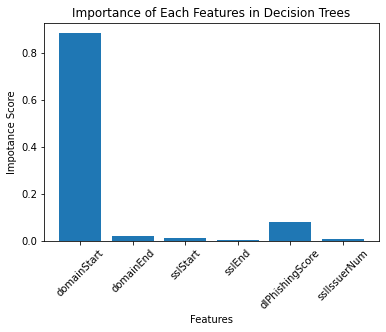

In [36]:
featureList=['','']
importance = models['Decision Trees'].feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0s, Score: %.5f' % (dataDfX.columns[i],v))
# plot feature importance
plt.title('Importance of Each Features in Decision Trees')
plt.bar([x for x in dataDfX.columns], importance)
plt.xticks(rotation = 45)
plt.xlabel("Features")
plt.ylabel("Impotance Score")
plt.show()

Feature: domainStart, Score: 0.43315
Feature: domainEnd, Score: 0.04222
Feature: sslStart, Score: 0.09706
Feature: sslEnd, Score: 0.09051
Feature: dlPhishingScore, Score: 0.30381
Feature: sslIssuerNum, Score: 0.03325


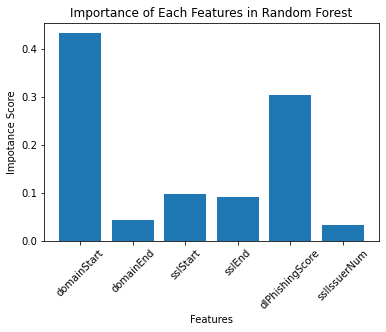

In [37]:
featureList=['','']
importance = models['Random Forest'].feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0s, Score: %.5f' % (dataDfX.columns[i],v))
# plot feature importance
plt.title('Importance of Each Features in Random Forest')
plt.bar([x for x in dataDfX.columns], importance)
plt.xticks(rotation = 45)
plt.xlabel("Features")
plt.ylabel("Impotance Score")
plt.show()

Feature: domainStart, Score: -0.00114
Feature: domainEnd, Score: 0.00097
Feature: sslStart, Score: -0.00589
Feature: sslEnd, Score: 0.00181
Feature: dlPhishingScore, Score: 1.01568
Feature: sslIssuerNum, Score: 0.09587


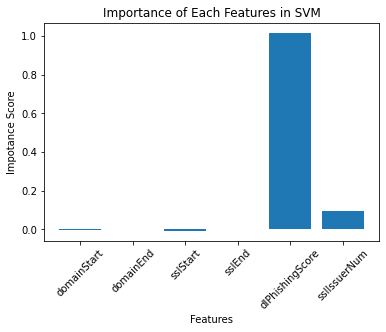

In [38]:
featureList=['','']
importance = models['Support Vector Machines'].coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0s, Score: %.5f' % (dataDfX.columns[i],v))
# plot feature importance
plt.title('Importance of Each Features in SVM')
plt.bar([x for x in dataDfX.columns], importance)
plt.xticks(rotation = 45)
plt.xlabel("Features")
plt.ylabel("Impotance Score")
plt.show()

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)